# Linear Regression Assignment


### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

### Client's Ask:

Which variables are significant in predicting the demand for shared bikes.How well those variables describe the bike demands

### Business Goal:

Model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## below steps for building linear regression model:
1. reading, understanding and visualizing the data 
2. preparing the data for modelling (train-test-split, rescaling etc)
3. training the model
4. residual analysis 
5. predictions and evaluation of the test data 
6. summary stats and conclusions

### step1: reading, understanding and visualizing the data 

#### 1.1 let's import required libraries and read the dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings 
warnings.filterwarnings('ignore')

#read the dataset

bike_df = pd.read_csv("day.csv")

bike_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### 1.2 understanding & cleaning data

In [2]:
bike_df.shape


(730, 16)

In [3]:
# here 730 rows and 16 columns 

In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# all columns are with non-null values 

In [6]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# convert such feature values into categorical string values for variables  'weathersit' and 'season' 
# lets lable month and weekday columns with user friendly categorical values 

bike_df[['weathersit']] = bike_df[['weathersit']].apply(lambda x: x.map({ 1: 'clear', 2:'mist', 3:'light_snow_rain',4:'heavy_snow_rain'}))

#  season : season (1:spring, 2:summer, 3:fall, 4:winter)
bike_df[['season']] = bike_df[['season']].apply(lambda x: x.map({ 1: 'spring', 2:'summer', 3:'fall',4:'winter'}))

# put month name for mnth categorical variable 
bike_df.mnth = bike_df.mnth.replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})


# put day name for weekday categorical variable 
bike_df.weekday = bike_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

#rename column hum for better business term
bike_df.rename(columns = {'hum':'humid'}, inplace = True)
bike_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humid,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Drop columns - instant & dteday as not giving any additional details for the model. Also cnt is sum of counts of 'casual' and registerd'


bike_df = bike_df.drop(columns=['instant', 'dteday', 'casual','registered'])
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humid,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


#### 1.3 visualizing dataset

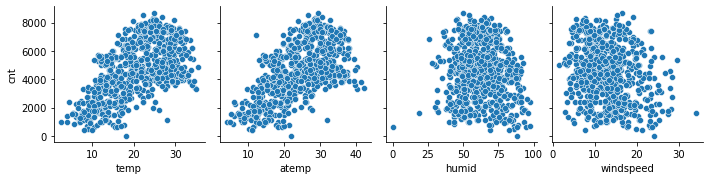

In [9]:
# visualizing dataset - continuous varibles 
sns.pairplot(bike_df, y_vars='cnt', x_vars=['temp','atemp','humid','windspeed'])
plt.show()

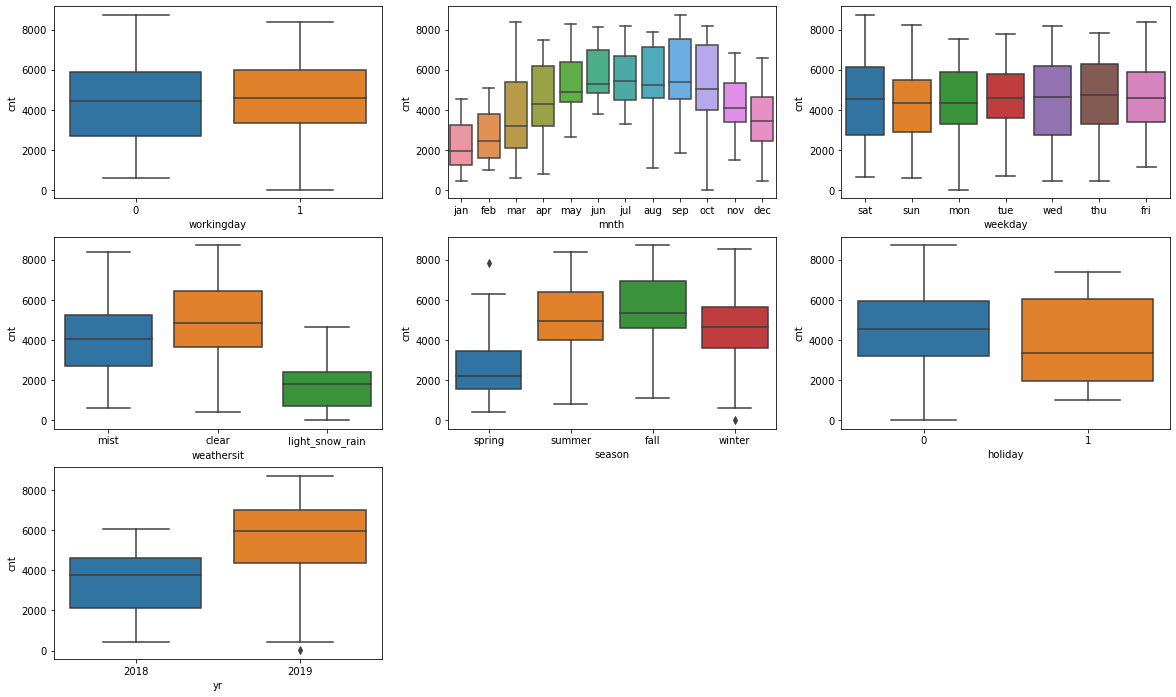

In [10]:
# visualizing dataset - categorical varibles 
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x= 'workingday', y='cnt', data=bike_df)
plt.subplot(3,3,2)
sns.boxplot(x= 'mnth', y='cnt', data=bike_df)
plt.subplot(3,3,3)
sns.boxplot(x= 'weekday', y='cnt', data=bike_df)
plt.subplot(3,3,4)
sns.boxplot(x= 'weathersit', y='cnt', data=bike_df)
plt.subplot(3,3,5)
sns.boxplot(x= 'season', y='cnt', data=bike_df)
plt.subplot(3,3,6)
sns.boxplot(x= 'holiday', y='cnt', data=bike_df)
plt.subplot(3,3,7)
sns.boxplot(x= 'yr', y='cnt', data=bike_df)
plt.xticks([0,1], ['2018', '2019'])
plt.show()


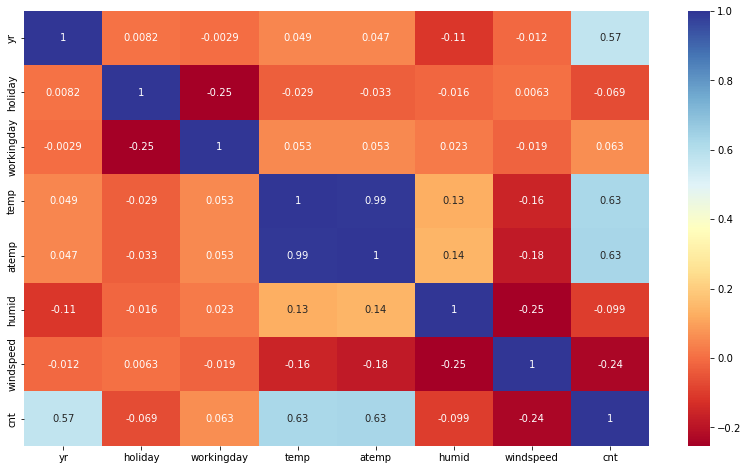

In [11]:
#plotiing the heat map for checking corelation
plt.figure(figsize = (14, 8))
sns.heatmap(bike_df.corr(), annot = True, cmap="RdYlBu")
plt.show()

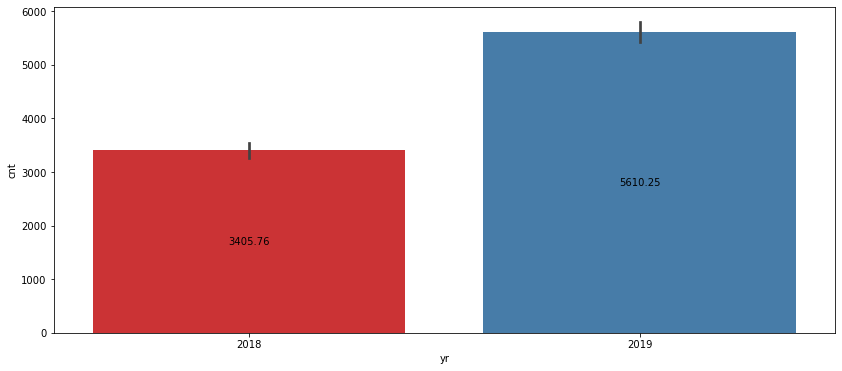

In [12]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x='yr', y='cnt' ,data=bike_df,palette='Set1')
plt.xticks([0,1], ['2018', '2019'])
ax.bar_label(ax.containers[0],  label_type='center', fontsize=10)
plt.show()

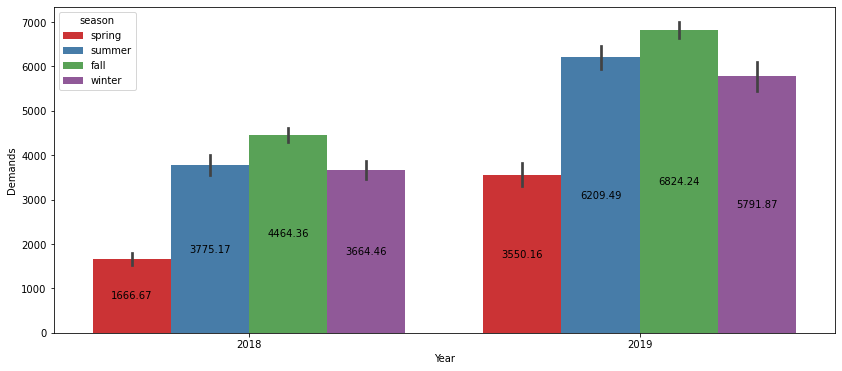

In [13]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x='yr', y='cnt' ,data=bike_df, hue='season',palette='Set1')
plt.xticks([0,1], ['2018', '2019'])

ax.bar_label(ax.containers[0],  label_type='center', fontsize=10)
ax.bar_label(ax.containers[1],  label_type='center', fontsize=10)
ax.bar_label(ax.containers[2],  label_type='center', fontsize=10)
ax.bar_label(ax.containers[3],  label_type='center', fontsize=10)

plt.xlabel('Year')
plt.ylabel('Demands')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)


plt.show()

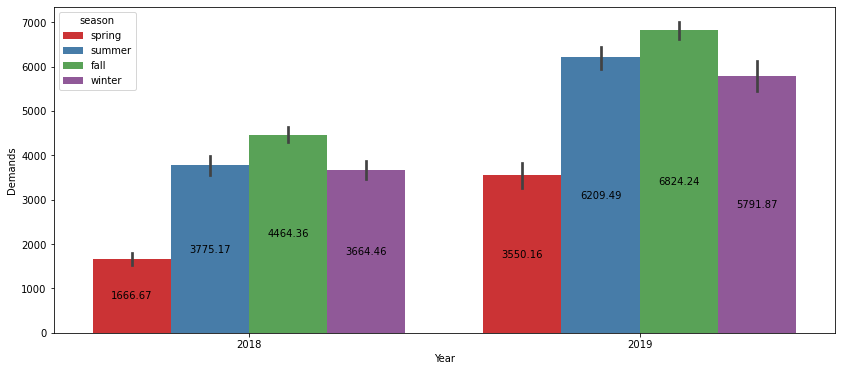

In [14]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x='yr', y='cnt' ,data=bike_df, hue='season',palette='Set1')
plt.xticks([0,1], ['2018', '2019'])

ax.bar_label(ax.containers[0],  label_type='center', fontsize=10)
ax.bar_label(ax.containers[1],  label_type='center', fontsize=10)
ax.bar_label(ax.containers[2],  label_type='center', fontsize=10)
ax.bar_label(ax.containers[3],  label_type='center', fontsize=10)

plt.xlabel('Year')
plt.ylabel('Demands')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)


plt.show()

In [15]:
# major demand growth (113%) in spring season 

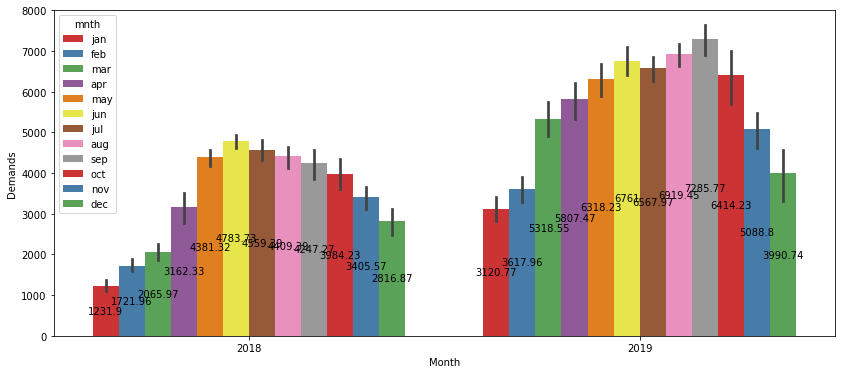

In [16]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x='yr', y='cnt' ,data=bike_df, hue='mnth',palette='Set1')
plt.xticks([0,1], ['2018', '2019'])
i=0
while i < bike_df.mnth.value_counts().size:
    ax.bar_label(ax.containers[i],  label_type='center', fontsize=10)
    i = i+1


plt.xlabel('Month')
plt.ylabel('Demands')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)


plt.show()

#### Lowest demands in Jan for both years; demands peak observed in Jun for 2018 and in Sep for 2019 

#### 1.4 observations: 

- variable 'temp': 2 variables ('temp' & 'atemp') for temparature details. Both are with linear correlation with the target variable ('cnt'). we will decide later which one to consider for the model 
- variable 'yr': Very positive demand growth (64%) in 2019 compare to 2018
- variable 'season': Major yearly demand surge (113%) in Spring compare to other seasons. Though maximum demands in fall season 
- variable 'mnth': Business is with increasing trend from Jan to Sep and later decreasing trend till Dec. Lowest demands in Jan for both years whereas demands peak observed in Jun for 2018 and in Sep for 2019 
- variable 'holiday': More demands during working days compare to holidays 
- variable 'weathersit':  Low demands when light snow or rains, moderate demands when misty and high demands when clear sky. No demands for heavy snow or rains 
- variable 'weekday': Lowest demands on Tues, overall low demands for start of the week and later demands increase till Sat and again drop from Sun

### step2: preparing the data for modelling
1) categorical variables to dummy variables
2) spitting into train and test
3) rescaling of variables

#### 2.1 categorical variables to dummy variables

In [17]:
# dropping a redundant dummy variable
Weather = pd.get_dummies(bike_df.weathersit, drop_first=True)
Season = pd.get_dummies(bike_df.season, drop_first=True)
Weekday = pd.get_dummies(bike_df.weekday, drop_first=True)
Month = pd.get_dummies(bike_df.mnth, drop_first=True)


In [18]:
#concat dummy df with original df
bike_df_new = pd.concat([bike_df, Month, Weekday, Weather, Season],axis=1)
bike_df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humid,...,sat,sun,thu,tue,wed,light_snow_rain,mist,spring,summer,winter
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


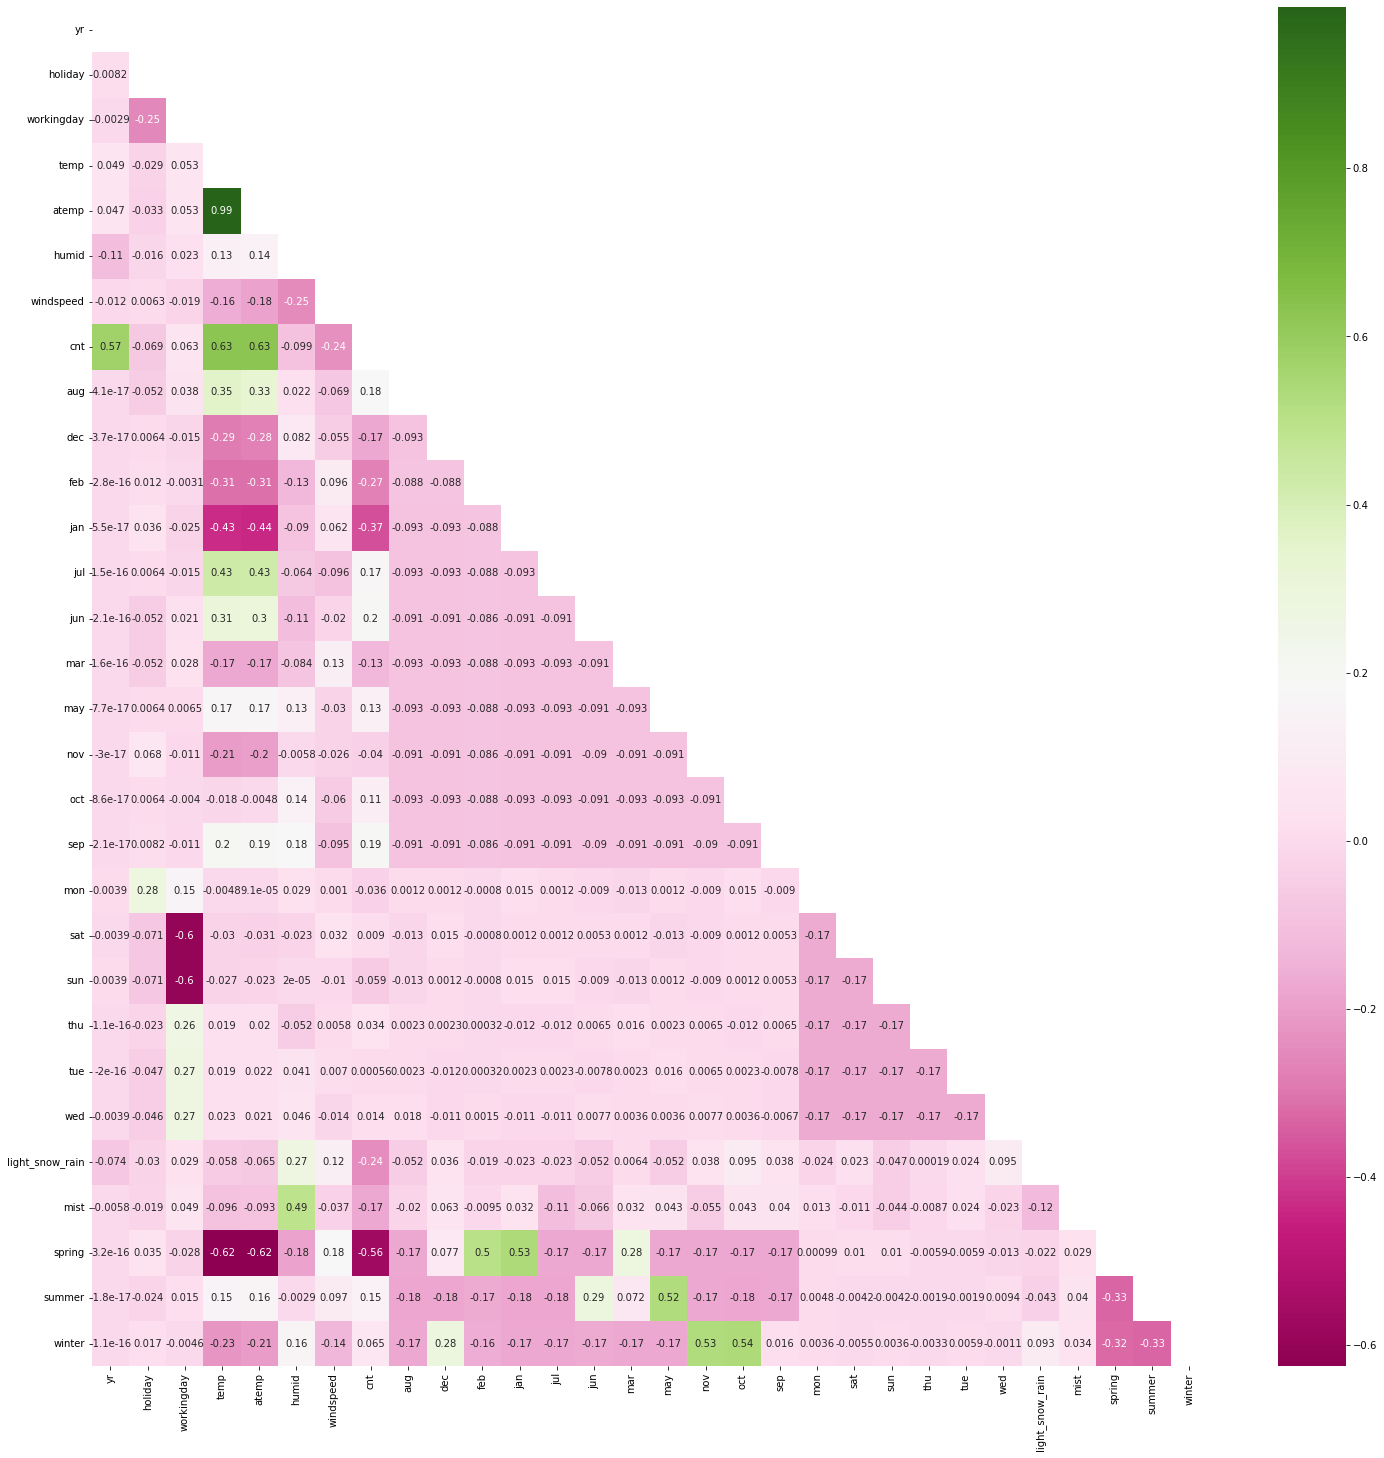

In [19]:
# let's observe correlation between the variables 
plt.figure(figsize = (25,25))
matrix = np.triu(bike_df_new.corr())
sns.heatmap(bike_df_new.corr(), annot = True, cmap="PiYG", mask=matrix)
plt.show()

In [20]:
# now lets drop 'weathersit','season', 'weekday' and 'mnth' as their appropriate dummy variables are created 
#strong correlation (0.99) between temp and atemp. Let's drop atemp as well

bike_df_new = bike_df_new.drop(columns=['weathersit', 'season', 'weekday', 'mnth', 'atemp'])
bike_df_new.head()

,yr,holiday,workingday,temp,humid,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,light_snow_rain,mist,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [21]:
bike_df_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'humid', 'windspeed', 'cnt',
       'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'light_snow_rain',
       'mist', 'spring', 'summer', 'winter'],
      dtype='object')

#### 2.2 splitting data into train & test 

In [22]:
# setting the random seed to 0, so the pseudo random numbers you get from random will start from the same point
np.random.seed(0)

# Let's use 70% data for training and 30% for testing  
bike_df_train, bike_df_test = train_test_split(bike_df_new, train_size=0.7, random_state = 100)

print (bike_df_train.shape)
print (bike_df_test.shape)

(510, 29)
(220, 29)


#### 2.3 rescaling of variables
we will use MinMax scaling method as features are of different scales 

In [23]:
#1. instantiate an object
scaler = MinMaxScaler()

# create list of only numeric vars
num_vars = ['temp','humid', 'windspeed','cnt']

#2. fit on data
bike_df_train[num_vars] = scaler.fit_transform(bike_df_train[num_vars])
bike_df_train.head()

,yr,holiday,workingday,temp,humid,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,light_snow_rain,mist,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [24]:
bike_df_train[num_vars].describe()

,temp,humid,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


### step3: training the model

In [25]:
bike_df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'humid', 'windspeed', 'cnt',
       'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'light_snow_rain',
       'mist', 'spring', 'summer', 'winter'],
      dtype='object')

In [26]:
# X_train, y_train 

X_train = bike_df_train
y_train = bike_df_train.pop('cnt')

#### 3.1 recursive feature elimination 


In [27]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [28]:
rfe_bike_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_bike_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,yr,True,1
24,mist,True,1
23,light_snow_rain,True,1
19,sun,True,1
18,sat,True,1
16,sep,True,1
26,summer,True,1
9,jan,True,1
27,winter,True,1
4,humid,True,1


In [29]:
# checking selected columns by RFE

X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'humid', 'windspeed', 'aug',
       'jan', 'sep', 'sat', 'sun', 'light_snow_rain', 'mist', 'summer',
       'winter'],
      dtype='object')

In [30]:
# number of columns 
X_train.columns[rfe.support_].size

15

In [31]:
# checking rejected columns by RFE

X_train.columns[~rfe.support_]

Index(['dec', 'feb', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'mon', 'thu',
       'tue', 'wed', 'spring'],
      dtype='object')

In [32]:
# Load X_train only for REF selected columns  
X_train = X_train[X_train.columns[rfe.support_]]
X_train.head()

,yr,holiday,workingday,temp,humid,windspeed,aug,jan,sep,sat,sun,light_snow_rain,mist,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,1,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,1,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,0,1,1,0


#### 3.2 defining custom functions 

In [33]:
def Cal_VIF(X_train_df):
    vif = pd.DataFrame()
    vif['features'] = X_train_df.columns
    vif['VIF'] = [variance_inflation_factor(X_train_df.values, i) for i in range (X_train_df.shape[1])]
    vif['VIF'] = round (vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

def Drop_Build(var, X_train):
    if (var):   # var= None then only build the model
        X = X_train.drop(var, axis=1)
    else :
        X = X_train
    # create new model
    X_train_sm  = sm.add_constant(X)
    lr = sm.OLS(y_train, X_train_sm)
    # fit the  model
    lr_model = lr.fit()
    # params
    print (lr_model.summary())
    print (Cal_VIF(X))
    return X 


#### 3.3 building the Model  

#### 3.3.1 model-1
(with all 15 variables)

In [34]:
# build model --- initially no variable to drop so first parameter None 
X_train_1 = Drop_Build(None, X_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Fri, 28 Oct 2022   Prob (F-statistic):          1.01e-191
Time:                        10:36:26   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1727      0.023     

#### 3.3.2 model-2
(removing variable 'holiday')

##### based on significance (p_values) and VIF, we can decide whether to drop any variables 
VIF - Variance Inflation Factor givies a basic quantative idea about
how much the feature variables are correated with each other.
It is an extremely important parameter to test our linear model.
VIFi = 1/(1 - Ri^2)

##### broad guidelines to follow 
*High p_value and high VIF (strong case to drop)
*High Low (candidates for removal)
high p and low VIF - first remove these types and check VIF again
high VIF and low p
*Low p and low VIF (continue with variables)

In [35]:
# Let's drop holiday column as with high p-value
X_train_2 = Drop_Build('holiday', X_train_1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Fri, 28 Oct 2022   Prob (F-statistic):          1.01e-191
Time:                        10:36:26   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1493      0.037     

#### 3.3.3. model-3
(removing variable 'humid')

In [36]:
# now all p_values < 0.05, lets remove column humid as highest VIF 
X_train_3 = Drop_Build('humid', X_train_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.8
Date:                Fri, 28 Oct 2022   Prob (F-statistic):          6.55e-189
Time:                        10:36:26   Log-Likelihood:                 508.90
No. Observations:                 510   AIC:                            -989.8
Df Residuals:                     496   BIC:                            -930.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0600      0.031     

#### 3.3.4 model-4
(removing variable 'workingday')

In [37]:
# p_values continued to be < 0.05, let's drop 'workingday' column as with high VIF
X_train_4 = Drop_Build('workingday', X_train_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Fri, 28 Oct 2022   Prob (F-statistic):          8.65e-187
Time:                        10:36:26   Log-Likelihood:                 501.07
No. Observations:                 510   AIC:                            -976.1
Df Residuals:                     497   BIC:                            -921.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1558      0.020     

#### 3.3.5 model-5
(removing variable 'sat')

In [38]:
# p_value shoot up for column 'sat', let's drop it 
X_train_5 = Drop_Build('sat', X_train_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.1
Date:                Fri, 28 Oct 2022   Prob (F-statistic):          1.27e-187
Time:                        10:36:26   Log-Likelihood:                 500.22
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     498   BIC:                            -925.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1584      0.020     

#### 3.3.6 model-6
(removing variable 'temp')

In [39]:
# p_values back to normal as < 0.05, let's drop 'temp' column as with high VIF
X_train_6 = Drop_Build('temp', X_train_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     117.4
Date:                Fri, 28 Oct 2022   Prob (F-statistic):          3.25e-124
Time:                        10:36:26   Log-Likelihood:                 347.43
No. Observations:                 510   AIC:                            -672.9
Df Residuals:                     499   BIC:                            -626.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4602      0.017     

#### 3.3.7 model-7 
(consider variable temp again as R2 dropped drastically without 'temp' and remove next high VIF variable 'windspeed' )

In [40]:
# dropped temp and R2 reduced drastically ... let's reuse X_train_5 and drop 2nd highest VIF variable 'windespeed '
 
    # p_values continued to be < 0.05, let's drop 'sun' column as with high VIF (> 2)
X_train_7 = Drop_Build('windspeed', X_train_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     232.1
Date:                Fri, 28 Oct 2022   Prob (F-statistic):          1.71e-180
Time:                        10:36:26   Log-Likelihood:                 480.52
No. Observations:                 510   AIC:                            -939.0
Df Residuals:                     499   BIC:                            -892.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0863      0.017     

#### 3.3.8 model-8
(removing variable 'jan')

In [41]:
# p_values continued to be < 0.05, let's drop 'jan' column as with high VIF > 2
X_train_8 = Drop_Build('jan', X_train_7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.7
Date:                Fri, 28 Oct 2022   Prob (F-statistic):          3.96e-181
Time:                        10:36:26   Log-Likelihood:                 479.14
No. Observations:                 510   AIC:                            -938.3
Df Residuals:                     500   BIC:                            -895.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0711      0.014     

#### 3.3.9 model-9
(removing variable 'yr')

In [42]:
X_train_9 = Drop_Build('yr', X_train_8)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     79.57
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           2.90e-84
Time:                        10:36:26   Log-Likelihood:                 248.01
No. Observations:                 510   AIC:                            -478.0
Df Residuals:                     501   BIC:                            -439.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1610      0.021     

In [43]:
X_train_10 = Drop_Build('summer', X_train_8)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     244.6
Date:                Fri, 28 Oct 2022   Prob (F-statistic):          1.28e-167
Time:                        10:36:26   Log-Likelihood:                 444.47
No. Observations:                 510   AIC:                            -870.9
Df Residuals:                     501   BIC:                            -832.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0838      0.015     

#### reconsidering 'yr' variable as after dropping it,  R2 squared was drastically reduced 

#### 3.3.10 final model is model-8  

In [44]:
# model-8 is well formed as p_values 0 (< 0.05) and VIF < 4. R-squared as 82.2% which is pretty good to finalize this model

### step4: residual analysis considering model-8

#### 4.1 Ordinary Least Squares (OLS) using statsmodels

In [45]:
X_train_sm  = sm.add_constant(X_train_8)
lr = sm.OLS(y_train, X_train_sm).fit()
y_train_pred = lr.predict(X_train_sm)

#### 4.2 Linear Reletionship

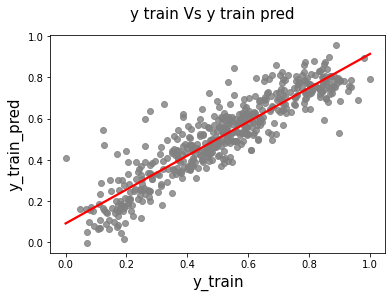

In [46]:
#histogram

fig = plt.figure()
fig.suptitle('y train Vs y train pred', fontsize=15)
sns.regplot(y_train, y_train_pred, ci=None, scatter_kws={"color": "grey"}, line_kws={"color": "red"})
plt.xlabel('y_train', fontsize=15)
plt.ylabel('y_train_pred', fontsize=15)
plt.show()

#### Conclusion: Linear relationship exists between actual and prediction and linear regression assumption is met with model-8 

#### 4.3 Multicolinearity  of Model-8

In [47]:
Cal_VIF(X_train_8)

,features,VIF
1,temp,4.04
0,yr,1.94
7,summer,1.79
2,aug,1.56
8,winter,1.47
6,mist,1.45
3,sep,1.29
4,sun,1.16
5,light_snow_rain,1.06


#### conclusion: as all VIF values < 5, there is no multicolinearity exists and linear regression assumption is met by model-8

#### 4.4 Actual Vs Predicted Target Varible using train data [plot] 

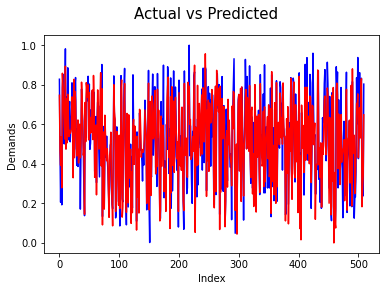

In [48]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train_8),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### conclusion: actual and predicted values follow similar pattern 

#### 4.5 Homoscedasticity Of Model 

Text(0, 0.5, 'Counts - Predicted Counts')

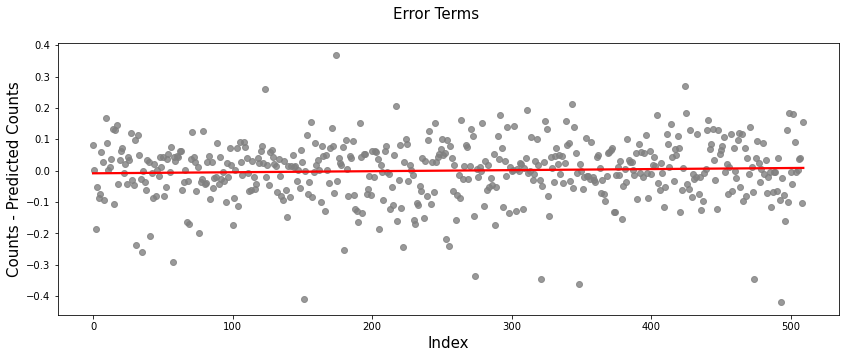

In [49]:
# plot error terms with train data 
c = [i for i in range(0,len(X_train_8),1)]
fig = plt.figure(figsize=(14,5))
sns.regplot(c, y_train-y_train_pred, ci=None, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

fig.suptitle('Error Terms', fontsize=15)              # Plot heading 
plt.xlabel('Index', fontsize=15)                      # X-label
plt.ylabel('Counts - Predicted Counts', fontsize=15) 

#### conclusion: homoscedasticity as the residuals have constant variance at every level of x; linear regression assumption is met by model-8 

#### 4.5 Error Terms Distribution 

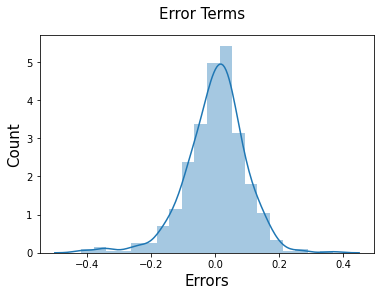

In [50]:
#histogram

fig = plt.figure()

sns.distplot((y_train - y_train_pred), bins=20)
fig.suptitle('Error Terms', fontsize=15)
plt.xlabel('Errors', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.show()

#### conclusion: error terms  are normally distribured here with mean 0 which indicates that the model is good and linear regression assumption is met by model-8

#### 4.6 R-squared on train data 

In [51]:
#Print R-squared Value for training data 
r2_score(y_train,y_train_pred).round(3)


0.822

#### 4.7 Adjusted R-squared on train data 

In [52]:

lr.rsquared_adj.round(3)

0.819

#### R-squared value is 82%; model is performing good 

### step5: predictions and evaluation of the test data

#### 5.1 apply on test data 

In [53]:

num_vars = ['temp','humid','windspeed', 'cnt']
bike_df_test[num_vars] = scaler.transform(bike_df_test[num_vars])

#### 5.2 dividing into X-test and y-test

In [54]:
y_test = bike_df_test.pop('cnt')
X_test = bike_df_test

#### 5.3 make predictions

In [55]:
X_test_new = X_test[X_train_8.columns]
X_test_new = sm.add_constant(X_test_new)
y_test_pred = lr.predict (X_test_new)

#### 5.4 model evaluation

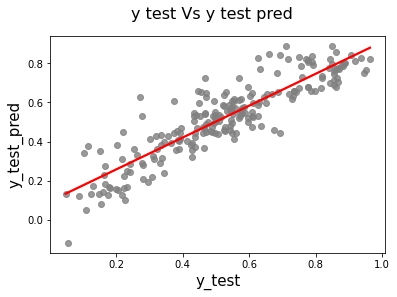

In [56]:
#histogram

fig = plt.figure()
fig.suptitle('y test Vs y test pred', fontsize=16)
sns.regplot(y_test, y_test_pred, ci=None, scatter_kws={"color": "grey"}, line_kws={"color": "red"})
plt.xlabel('y_test', fontsize=15)
plt.ylabel('y_test_pred', fontsize=15)
plt.show()



#### linear relationship between actual and predicted test data 

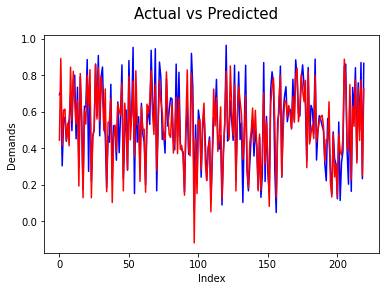

In [57]:
# Actual vs Predicted
c = [i for i in range(0,len(X_test),1)]
plt.plot(c,y_test, color="blue")
plt.plot(c,y_test_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### actual and predicted values with similar pattern; model is performing good with the test data 

#### Homoscedasticity Of Model

Text(0, 0.5, 'Counts - Predicted Counts')

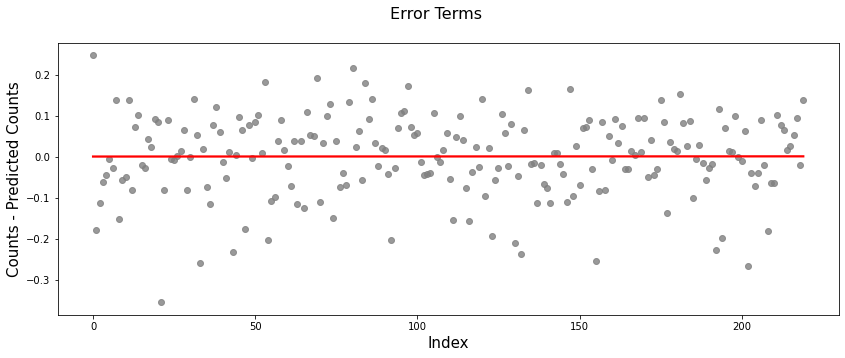

In [58]:
# plot error terms with test data 
c = [i for i in range(0,len(X_test),1)]
fig = plt.figure(figsize=(14,5))
sns.regplot(c, y_test-y_test_pred, ci=None, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Index', fontsize=15)                      # X-label
plt.ylabel('Counts - Predicted Counts', fontsize=15) 

#### homoscedasticity as the residuals have constant variance at every level of x for test data too

#### 5.5 R-squared on test data 

In [59]:
r2_test = r2_score(y_test, y_test_pred).round(3)
r2_test

0.798

#### 5.6 Adjusted R-squared on test data 

In [60]:
# number of test data observations (n) .... number of rows 
n = X_train_8.shape[0]
print('n=', n)

# number of predictors (k)  .... number of columns 
k= X_train_8.shape[1]
print('k=', k)

Adj_r2_test = 1 - ((1-r2_test)*(n-1)/(n-k-1))
Adj_r2_test.round(3)

n= 510
k= 9


0.794

#### module-8 evaluation successful 

In [61]:
# here linear correlation between y test and y prediction. So we can conclude model is evaluated successfully  

In [62]:
lr.params

const              0.071052
yr                 0.231555
temp               0.544107
aug                0.057489
sep                0.118258
sun               -0.044770
light_snow_rain   -0.296800
mist              -0.079591
summer             0.097684
winter             0.145187
dtype: float64

In [63]:
# we will use these variable wise units for building the best fitted straight line equation 

### step 6: summary stats and conclusions 

### summary:

- Train R-squared: 82.2% [from model-8 result summary]
- Train Adjusted R-squared:81.9% [from model-8 result summary]
- Test R-squared: 79.8%
- Test Adjusted R-squared:79.4%
- These stats help conclude that the model-8 is a decent model

### conclusions:

[A] model-8 is finalized; linear regression below assumptions are met 

1. linear relationship 
2. no multicollinearity 
3. homoscedasticity 
4. normal sistribution of error terms 

[B] equation of the best fitted line is as below 

cnt = 0.071052 + (0.231555 * yr) + (0.544107 * temp) + (0.057489 * aug) + (0.118258 * sep) - (0.044770 * sun) - (0.296800 * light_snow_rain) - (0.079591 * mist) + (0.097684 * summer) + (0.145187 * winter)

[C] top 3 predicators positively impacting on target variable are as below; use these for more demands/business planning like arranging new bikes, proactive bike maintenance
1. temp (+ 0.544107)

2. yr (+ 0.231555)

3. winter (+ 0.145187) 

suggestions:
- year on year demands are increasing and need to proactively do next year business planning
- demands grow up with increase in temperature 
- high demands during winter 


[D] below predictors are negatively impacting and slowing down business
1. Light_Snow_Rain (- 0.296800)

2. mist (- 0.079591)

3. sun (- 0.044770)

Plan bike maintenace during these off period. Need to plan better offers to attact customers during weather as light snow or rains, summer season and on Sunday 

[E] Top 3 predicators which are with high weightage and contributing significantly to explain demands

1. temp (+0.544107)

2. yr (+ 0.231555)

3. low_snow_rain (- 0.296800)